In [118]:
import numpy as np
import matplotlib.pyplot as plt 
import math as math
np.random.seed(42) # for reproducibility

### Generate Data

In [97]:
m= 1000; mean=0; std=0; 
x = np.random.uniform(-10,10, m) 
noise = np.random.normal(mean, std, m) # Gaussian distribution (normal(mean,std,no of samples))
true_w, true_b = 7.6, -3.3

y = true_w * x + true_b + noise # y = w * x + b + ε

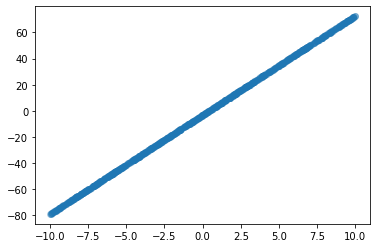

In [98]:
plt.scatter(x,y, alpha=0.3)

### Linear Regression Model
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

### Cost Function
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [99]:
def compute_cost(x,y,w,b):
    cost = 0
    for i in range(m):
        f = w * x[i] + b
        cost = cost + (f - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

#### Plotting cost at constant b and varying w

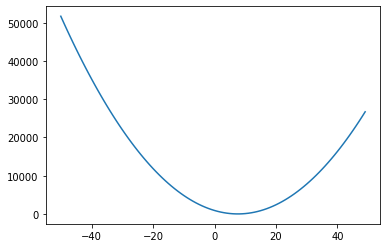

In [101]:
w_max = 50; const_b = -3.3
w = np.arange(-w_max,w_max)
calculated_cost = []

for i in range(len(w)):
    calculated_cost.append(compute_cost(x,y,w[i],const_b))

plt.plot(w,calculated_cost)

#### Plotting cost at constant w and varying b

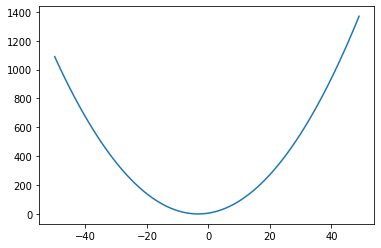

In [103]:
b_max = 50; const_w = 7.5
b = np.arange(-b_max,b_max)
calc_cost = []

for i in range(len(b)):
    calc_cost.append(compute_cost(x,y,const_w,b[i]))
    
plt.plot(b,calc_cost)

### Gradient Descent
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


In [113]:
def compute_gradient(x,y,w,b):
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f = w * x[i] + b
        dj_dw = dj_dw + (f - y[i]) * x[i]
        dj_db = dj_db + (f - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [127]:
def gardient_descent(x,y,w_in,b_in,alpha,num_iters):
    J_history = []
    p_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        # calculate gradients
        dj_dw , dj_db = compute_gradient(x,y,w,b)
        
        # update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        J_history.append(compute_cost(x,y,w,b))
        p_history.append([w,b])
                
    return w,b,J_history , p_history
 

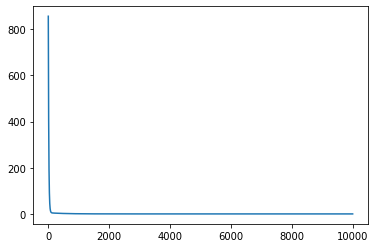

In [132]:
w,b,J_history , p_history = gardient_descent(x,y,0,0,0.001,10000)
plt.plot(J_history)

In [133]:
print(w , b)

7.600001271732253 -3.2998506272188948
